# Deflection

## Determination of Deflection Response

The important methods used for finding out the slope and deflection at a section in a loaded beam are
1. Double integration method
2. Moment area method
3. Macaulay‟s method

With the moment-area method, the curvature diagram of a half-model according to the internal moment in Figure 1.2(c-e) is divided into several areas. By taking the moment of the areas around the left support, the mid-span deflection is obtained. A set of equations for calculating the mid-span deflection δ of the three-point bending at the first cracking (δcr), at ultimate (δu) when material has μ>μcrit, and at ultimate when material has μ<μcrit are presented in Eqs.12 (a-c). Mcr and Mu are the bending moments corresponding to the first cracking (φcr, δcr) and ultimate state (φu, δu), respectively.

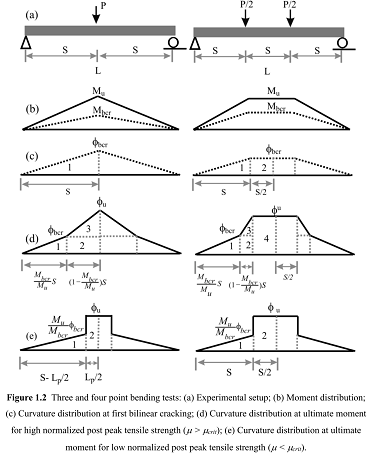


## Import modules

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
from sympy import *


In [ ]:
from scipy.optimize import newton, brentq, root

In [ ]:
%run moment_curvature.ipynb

In [ ]:
model_data

In [ ]:
# L = 100
# L_p = 120
# phi_u = 0.008
# phi_cr = 0.004
# M_u = 25.0
# M_cr = 20.0
# mu = 0.1
# mu_crit = 0.03
# delta_cr = 0.5

In [ ]:
M,L ,L_p,phi,phi_u,phi_cr,M_u,M_cr,mu,mu_crit,delta_cr = sp.symbols(
    r'M,L ,L_p,phi,phi_u,phi_cr,M_u,M_cr,mu,mu_crit,delta_cr', 
    real=True, nonnegative=True
)

In [ ]:
load = M_arr*4/L


In [ ]:
delta = sp.Piecewise(
    (Rational(1,12)*(L**2)*phi, phi <= phi_cr),
        ((L**2/(24*M**2))*((2*M**2-M*M_cr**2-M_cr**2)*phi + (M**2 + M*M_cr)*phi_cr) ,  phi > phi_cr),

#     ((L**2/(24*M**2))*((2*M**2-M*M_cr**2-M_cr**2)*phi + (M**2 + M*M_cr)*phi_cr) ,  mu > mu_crit),
#     ((phi*L_p/8 * (2*L-L_p)) + (M*phi_cr*L / (12*M_cr)*(L - 2*L_p)) , mu < mu_crit)
)

delta

In [ ]:
model_data = {
    phi_cr : 0.0035,
    L : 1,
    L_p : 3,
    M_cr : -25, 
    mu_crit : 0.1
}

In [ ]:
delta.subs(model_data)

In [ ]:
get_delta = sp.lambdify(
    (M, phi), delta.subs(model_data), 'numpy'
)

In [ ]:
d = get_delta (M_arr, kappa_arr)

In [ ]:
# idx = 8
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(kappa_arr, M_arr)
ax2.plot(load, d);